# Applied Neural Networks Homework 2
Leslie Kerby

# **MNIST Digits and Keras continued**</br>
Import in the MNIST digits dataset (70,000 images, each 28x28 pixels). Preprocess the data as necessary. The training set should have 60k images and the test set 10k. Also create a validation set within the training set -- using 10% of the training data. 

**Part 1** </br>
Create a deep and wide neural network using the Keras Functional API (exact architecture left up to you). Train it for an appropriate number of epochs with an appropriate learning rate and plot the accuracy/loss vs epoch. Find the accuracy on the test data and plot the first five misclassified images. 

**Part 2**</br>
Use the subclassing API to create a different multi-path network than Part 1 (ie, a deep and wide network is multi-path) with two different inputs. Send all pixels in one input and a subset of pixels in the second input. Experiment with different architectures. Train it for an appropriate number of epochs with an appropriate learning rate and plot the accuracy/loss vs epoch. Find the accuracy on the test data and plot the first five misclassified images.

**Part 3**</br>
Which NN was the best? What was its accuracy? It's confusion matrix? Discuss. 

# **Part 1**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

np.random.seed(15)
tf.random.set_seed(15)

mnist_digits = keras.datasets.mnist
(X_train_full, Y_train_full), (X_test, Y_test) = mnist_digits.load_data()
# preprocess
X_train_full = X_train_full / 255
X_test = X_test / 255
# Reshape
X_train_full = X_train_full.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
# Validation Dataset
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full, Y_train_full, test_size=5000)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
y_train_tr.shape

(55000,)

In [3]:
X_train_tr.shape

(55000, 784)

In [4]:
# Create the Deep Wide NN. Only 100 neurons per hidden layer for now
input = keras.layers.Input(shape=(784,), name="input")
hidden1 = keras.layers.Dense(100, activation="relu", name="Hidden1")(input)
hidden2 = keras.layers.Dense(100, activation="relu", name="Hidden2")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(10, activation="softmax")(concat)

model = keras.models.Model(inputs=[input], outputs=[output])
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(learning_rate=5e-3), metrics="accuracy")

In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 784)]        0           []                               
                                                                                                  
 Hidden1 (Dense)                (None, 100)          78500       ['input[0][0]']                  
                                                                                                  
 Hidden2 (Dense)                (None, 100)          10100       ['Hidden1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 884)          0           ['input[0][0]',                  
                                                                  'Hidden2[0][0]']            

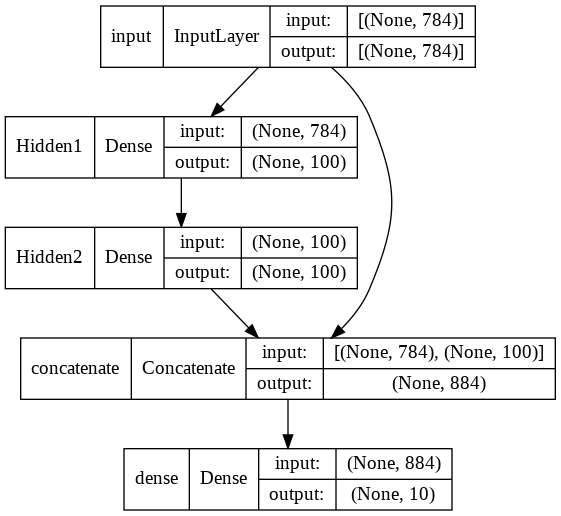

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(X_train_tr, y_train_tr, epochs=30, validation_data=(X_train_v, y_train_v))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9851 - accuracy: 0.7727 - val_loss: 0.5984 - val_accuracy: 0.8604
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5247 - accuracy: 0.8692 - val_loss: 0.4583 - val_accuracy: 0.8776
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4323 - accuracy: 0.8868 - val_loss: 0.3961 - val_accuracy: 0.8920
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3841 - accuracy: 0.8958 - val_loss: 0.3587 - val_accuracy: 0.9002
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3519 - accuracy: 0.9026 - val_loss: 0.3332 - val_accuracy: 0.9048
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3279 - accuracy: 0.9086 - val_loss: 0.3128 - val_accuracy: 0.9096
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3079 - accuracy: 0.9140 - val_loss: 0.2940 - val_accuracy:

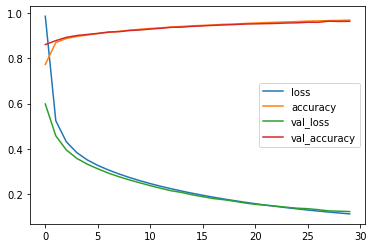

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1262 - accuracy: 0.9626


[0.12624403834342957, 0.9625999927520752]

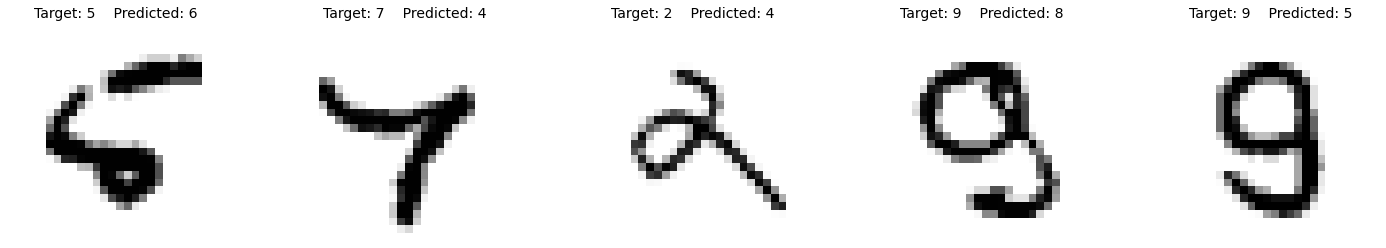

In [ ]:
# Find some of the misclassified numbers
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

predictions = np.argmax(model.predict(X_test), axis=-1)
misclassifiedIndexes = []
index = 0
for target, predict in zip(Y_test, predictions):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

misclassifiedIndexes

plt.figure(figsize=(25,4))
for index in range(5):
  plt.subplot(1,5,index+1)
  plt.imshow(X_test[misclassifiedIndexes[index]].reshape(28,28), cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {classes[Y_test[misclassifiedIndexes[index]]]}    Predicted: {classes[predictions[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()

#Evaluation of Part 1 Model
This first deep and wide model has a similar performance to the sequential model created in homework 1. I chose to only use 100 neurons for each of the hidden layers to see how the model would perform with not too much power. I found that the loss and accuracy began to pretty much flatten out around 30 epochs with an accuracy of 96.3% and a loss of 12.6%. The model can be improved upon, but still performs quite well for only consisting of 2 hidden layers, and 1 concat layer. The misclassified numbers are similar to the numbers miscalssified in homework 1. most of them are pretty ambiguous, excpet for maybe the 5th wrong element which looks like a pretty convincing 9. The deep and wide model will be further improved upon in part 2.

# **Part 2**

In [6]:
# Here is where we define our Wide and Deep class
class WideAndDeepModel(keras.models.Model):
  # units is number of default neurons
  # activation is the default activation function
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.hidden3 = keras.layers.Dense(units, activation=activation)
    self.hidden4 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(10, activation="softmax")
    self.aux_output = keras.layers.Dense(10, activation="softmax")
    self.concat = keras.layers.Concatenate()

  def call(self, inputs):
    input_A, input_B = inputs
    # We have 4 hidden layers where input B goes through the 4 layers then
    # gets concatenated then passed to main output. Input A goes straight
    # to the concat layer then the main output
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    hidden3 = self.hidden3(hidden2)
    hidden4 = self.hidden4(hidden3)
    concat = self.concat([input_A, hidden4])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden4)
    return main_output, aux_output

model = WideAndDeepModel(units=500, activation="relu")

In [7]:
model.compile(loss="sparse_categorical_crossentropy", loss_weights=[0.8, 0.2], optimizer=tf.keras.optimizers.SGD(learning_rate=5e-2), metrics=["accuracy"])

#**Model 1**

In [ ]:
# the first modification to the model will be adding 2 more hidden layers as well
# as an aux output and see how the model performs differently
# -> 100 neurons
# -> 4 hidden layers
# -> loss_weights [0.9, 0.1]
# -> learning rate = 5e-3
# -> Input_A = half pixels
# -> Input_B = All pixels
# -> 30 epochs
history = model.fit((X_train_tr[:,392:], X_train_tr), [y_train_tr, y_train_tr], 
                    epochs=30, validation_data=((X_train_v[:,392:], X_train_v), [y_train_v, y_train_v]))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.4243 - output_1_loss: 1.3389 - output_2_loss: 2.1927 - output_1_accuracy: 0.6266 - output_2_accuracy: 0.2553 - val_loss: 0.9202 - val_output_1_loss: 0.8172 - val_output_2_loss: 1.8470 - val_output_1_accuracy: 0.7690 - val_output_2_accuracy: 0.4244
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6431 - output_1_loss: 0.5762 - output_2_loss: 1.2450 - output_1_accuracy: 0.8396 - output_2_accuracy: 0.6602 - val_loss: 0.4636 - val_output_1_loss: 0.4253 - val_output_2_loss: 0.8081 - val_output_1_accuracy: 0.8742 - val_output_2_accuracy: 0.8070
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4012 - output_1_loss: 0.3768 - output_2_loss: 0.6212 - output_1_accuracy: 0.8910 - output_2_accuracy: 0.8511 - val_loss: 0.3506 - val_output_1_loss: 0.3337 - val_output_2_loss: 0.5022 - val_output_1_accuracy: 0.9004 - val_output_2_accuracy: 0.8762
Epoch 4/30
1719/1719 [

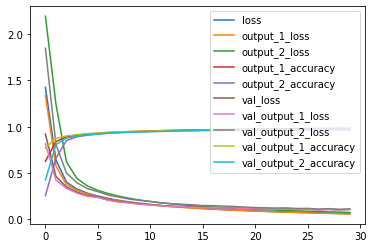

In [ ]:
# Graph for model 1
pd.DataFrame(history.history).plot()

#Model 1 Evaluation
For the first model, the only improvement made from before is the addition of 2 more hidden layers and an auxillary output. These changes appear to be quite substantial however as the model took half as many epochs (15) to average to the performance of the previous model. The time used to fit the model was also pretty much the same with only 2 seconds extra for each epoch. However, the model did not become any more accurate and had the same loss rate. So the only noticable imrpovement from adding hidden layers and an auxillary output is the rate at which the model became fit.

#**Model 2**

In [ ]:
# For the next modification, I want to see what happens changing the inputs. 
# input A will now get the full pixels while input B only gets half.
# I will also reduce the amount of epochs to only 20
# -> 100 neurons
# -> 4 hidden layers
# -> loss_weights [0.9, 0.1]
# -> learning rate = 5e-3
# -> Input_A = All Pixels
# -> Input_B = half pixels
# -> 20 epochs
history = model.fit((X_train_tr, X_train_tr[:,392:]), [y_train_tr, y_train_tr], 
                    epochs=20, validation_data=((X_train_v, X_train_v[:,392:]), [y_train_v, y_train_v]))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 1.1784 - output_1_loss: 1.0570 - output_2_loss: 2.2708 - output_1_accuracy: 0.7617 - output_2_accuracy: 0.1397 - val_loss: 0.8115 - val_output_1_loss: 0.6582 - val_output_2_loss: 2.1910 - val_output_1_accuracy: 0.8558 - val_output_2_accuracy: 0.2062
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7263 - output_1_loss: 0.5781 - output_2_loss: 2.0604 - output_1_accuracy: 0.8618 - output_2_accuracy: 0.2893 - val_loss: 0.6440 - val_output_1_loss: 0.5058 - val_output_2_loss: 1.8880 - val_output_1_accuracy: 0.8734 - val_output_2_accuracy: 0.4032
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5968 - output_1_loss: 0.4766 - output_2_loss: 1.6783 - output_1_accuracy: 0.8763 - output_2_accuracy: 0.4690 - val_loss: 0.5382 - val_output_1_loss: 0.4362 - val_output_2_loss: 1.4566 - val_output_1_accuracy: 0.8838 - val_output_2_accuracy: 0.5708
Epoch 4/20
1719/1719 [

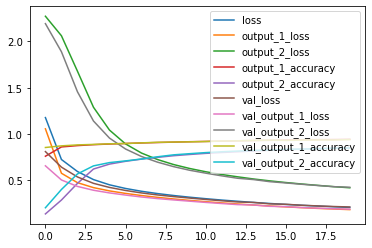

In [ ]:
# From model 2
pd.DataFrame(history.history).plot()

#Model 2 Evaluation
After switching the inputs for this model, it performed much worse, but that makes sense. The full 784 pixels were being sent straight to the concat layer without any processing while only half the 784 pixels were being put through the hidden layers. So the model only had half as much information to train from. Because of this, loss was up 10% and accuracy was down 10%, which is less than expected, but still a step in the wrong direction. For the next model, the input will need to be switched back.

#**Model 3**

In [ ]:
# More neurons and higher learning rate
# -> 500 neurons
# -> 4 hidden layers
# -> loss_weights [0.9, 0.1]
# -> learning rate = 0.2
# -> Input_A = half Pixels
# -> Input_B = all pixels
# -> 20 epochs
history = model.fit((X_train_tr[:,392:], X_train_tr), [y_train_tr, y_train_tr], 
                    epochs=20, validation_data=((X_train_v[:,392:], X_train_v), [y_train_v, y_train_v]))

Epoch 1/20
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2654 - output_1_loss: 0.2587 - output_2_loss: 0.3261 - output_1_accuracy: 0.9213 - output_2_accuracy: 0.9106 - val_loss: 0.1170 - val_output_1_loss: 0.1158 - val_output_2_loss: 0.1273 - val_output_1_accuracy: 0.9676 - val_output_2_accuracy: 0.9652
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1033 - output_1_loss: 0.1025 - output_2_loss: 0.1105 - output_1_accuracy: 0.9694 - output_2_accuracy: 0.9672 - val_loss: 0.1225 - val_output_1_loss: 0.1229 - val_output_2_loss: 0.1195 - val_output_1_accuracy: 0.9636 - val_output_2_accuracy: 0.9676
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0693 - output_1_loss: 0.0688 - output_2_loss: 0.0742 - output_1_accuracy: 0.9789 - output_2_accuracy: 0.9775 - val_loss: 0.1448 - val_output_1_loss: 0.1469 - val_output_2_loss: 0.1259 - val_output_1_accuracy: 0.9564 - val_output_2_accuracy: 0.9622
Epoch 4/20
1719/1719 [

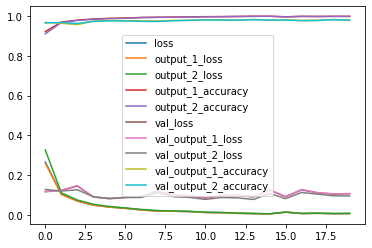

In [ ]:
# From model 3
pd.DataFrame(history.history).plot()

#Model 3 Evaluation
Increasing the learning rate paired with increasing the neurons caused the model to become overfit very quickly. A high accuracy was reached only after around 10 epochs but was unstable after that point. However it has been the best performing and most accurate model so far, so if the learning rate is a little more strict, the model will become much better. 

#**Model 4**

In [8]:
# Refined learning rate, different weight on loss
# -> 500 neurons
# -> 4 hidden layers
# -> loss_weights [0.8, 0.2]
# -> learning rate = 5e-2
# -> Input_A = half Pixels
# -> Input_B = all pixels
# -> 20 epochs
history = model.fit((X_train_tr[:,392:], X_train_tr), [y_train_tr, y_train_tr], 
                    epochs=20, validation_data=((X_train_v[:,392:], X_train_v), [y_train_v, y_train_v]))

Epoch 1/20
1719/1719 [==============================] - 15s 8ms/step - loss: 0.3710 - output_1_loss: 0.3575 - output_2_loss: 0.4253 - output_1_accuracy: 0.8932 - output_2_accuracy: 0.8807 - val_loss: 0.1608 - val_output_1_loss: 0.1594 - val_output_2_loss: 0.1666 - val_output_1_accuracy: 0.9478 - val_output_2_accuracy: 0.9538
Epoch 2/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1315 - output_1_loss: 0.1306 - output_2_loss: 0.1350 - output_1_accuracy: 0.9607 - output_2_accuracy: 0.9607 - val_loss: 0.1101 - val_output_1_loss: 0.1091 - val_output_2_loss: 0.1143 - val_output_1_accuracy: 0.9664 - val_output_2_accuracy: 0.9640
Epoch 3/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0875 - output_1_loss: 0.0869 - output_2_loss: 0.0901 - output_1_accuracy: 0.9733 - output_2_accuracy: 0.9733 - val_loss: 0.1301 - val_output_1_loss: 0.1307 - val_output_2_loss: 0.1279 - val_output_1_accuracy: 0.9576 - val_output_2_accuracy: 0.9574
Epoch 4/20
1719/171

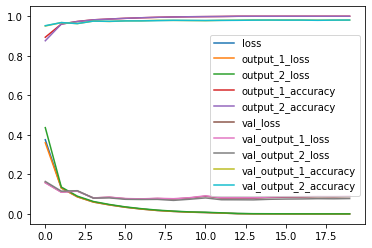

In [ ]:
# From model 4
pd.DataFrame(history.history).plot()

#Model 4 Evaluation
By adjusting the loss weights to favor one input less than another as well as refining the learning rate, then model was fit the best it has been compared to any of the other models. Its validation loss was down around 3% and the validation accuracy was up about 2% which are very good improvements when the change is from 96% to 98%. This means the model is functioning almost perfectly after only 20 epochs. The training set also reached 100% accuracy and extremely small loss, but those figures don't matter as much as the validation data. The model also didn't appear to become overfit. The accuracy and loss never bumped around and only got more refined over time. 

In [ ]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
confusion = tf.math.confusion_matrix(labels=labels)

# **Part 3**
The final designed model performed the best when compared to all other models. It ended up having an accuracy around 98% which shows that most of its input were predicted correctly. This increase in performance was due to increasing the number of neurons per layer, adding more hidden layers, changing the learning rate to be larger, and redistributing the loss weights slightly. All of the edits compounded into a model that was more complex so it able to learn more easily. 